# Loading Libraries, etc

In [ ]:
!python -m spacy download en_core_web_lg
# After downloading the model, restart the runtime, otherwise it can't be loaded
# into memory for some reason.

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=705bb892b2114617d084b328d1342ea03eb27a53627509d47ff9772afd7e8429
  Stored in directory: /tmp/pip-ephem-wheel-cache-3v4ysl0h/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


import pandas as pd
import numpy as np

import nltk
nltk.download("punkt")

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

from numpy import array
from numpy import asarray
from numpy import zeros


from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.utils import plot_model

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Uploading the data

In [ ]:
train = pd.read_csv("train.txt", sep="\t")
test = pd.read_csv("test.txt", sep="\t")
dev = pd.read_csv("dev.txt", sep = "\t")
train = train[["Tweet", "anger", "fear", "pessimism", "sadness"]]
test = test[["Tweet", "anger", "fear", "pessimism", "sadness"]]
dev = dev[["Tweet", "anger", "fear", "pessimism", "sadness"]]
#train = pd.concat([train, dev])

train_labels = train[["anger", "fear","pessimism","sadness"]]
test_labels = test[["anger", "fear","pessimism","sadness"]]

In [ ]:
trainDF = pd.concat([train, test])

In [ ]:
train_xd = train["Tweet"]
valid_xd = test["Tweet"]

train_y = train_labels.values
valid_y = test_labels.values

In [ ]:
train_df = pd.read_csv("train1_colab.csv")

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer("english")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
nltk.word_tokenize("loh is dead!")

['loh', 'is', 'dead', '!']

In [ ]:
def clean_text(X):
  documents = []
  for sen in range(0, len(X)):  
      # Remove all the special characters
      document = re.sub(r'\W', ' ', str(X[sen]))

      # remove all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

      # Remove single characters from the start
      document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

      # Substituting multiple spaces with single space
      document = re.sub(r'\s+', ' ', document, flags=re.I)

      # Removing prefixed 'b'
      document = re.sub(r'^b\s+', '', document)

      # Converting to Lowercase
      document = document.lower()
      
      # Lemmatization & stop words
      document = document.split()
      document = [word for word in document if word not in stop_words]
      document = ' '.join(document)
      documents.append(document)
  return(documents)

In [ ]:
train_x = clean_text(train_xd)

In [ ]:
valid_x = clean_text(valid_xd)

# Various pre-processing options

### Word embedding

In [ ]:
all_tweets = clean_text(trainDF["Tweet"].tolist())

In [ ]:
all_tweets

['worry payment problem joyce meyer motivation leadership worry',
 'decide sure makes happy',
 'max_kellerman helps majority nfl coaching inept bill brien play calling wow gopats',
 'accept challenges literally feel exhilaration victory george patton',
 'roommate okay spell autocorrect terrible firstworldprobs',
 'cute atsu probably shy photos cherry helped uwu',
 'think humans sense recognizing impending doom',
 'rooneys fucking untouchable isn fucking dreadful depay looked decent ish tonight',
 'pretty depressing hit pan ur favourite highlighter',
 'bossupjaee pussy weak heard stfu bitch got threaten pregnant',
 'making yearly transition excited hopeful college returner sick exhausted pessimist college',
 'hard dance devil nso shake',
 'tiller breezy collab album rapping singing prolly fire',
 's girl hit car lucky scratch spared wrath sleep deprived kait',
 'bt_uk broadband shocking regretting signing angry shouldofgonewithvirgin',
 'people need look definition protest protesting ca

In [ ]:
tokenizer = text.Tokenizer()
#all_tweets = clean_text(trainDF["Tweet"])
tokenizer.fit_on_texts(all_tweets)

train_seq_x = tokenizer.texts_to_sequences(train_x)
valid_seq_x = tokenizer.texts_to_sequences(valid_x)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 50

train_seq_x = sequence.pad_sequences(train_seq_x, padding='post', maxlen=maxlen)
valid_seq_x = sequence.pad_sequences(valid_seq_x, padding='post', maxlen=maxlen)

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = nlp(word).vector
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
trainDF

,Tweet,anger,fear,pessimism,sadness
0,“Worry is a down payment on a problem you may ...,0,0,0,0
1,Whatever you decide to do make sure it makes y...,0,0,0,0
2,@Max_Kellerman it also helps that the majorit...,1,0,0,0
3,Accept the challenges so that you can literall...,0,0,0,0
4,My roommate: it's okay that we can't spell bec...,1,0,0,0
...,...,...,...,...,...
3254,shaft abrasions from panties merely shifted to...,1,0,1,0
3255,@lomadia heard of Remothered? Indie horror gam...,0,0,1,0
3256,All this fake outrage. Y'all need to stop 🤣,1,0,0,0
3257,Would be ever so grateful if you could record ...,0,0,0,0


# Additional Features

In [ ]:
trainDF['char_count'] = trainDF['Tweet'].apply(len)
trainDF['word_count'] = trainDF['Tweet'].apply(lambda x: len(x.split()))
trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
trainDF['punctuation_count'] = trainDF['Tweet'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
trainDF['title_word_count'] = trainDF['Tweet'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
trainDF['upper_case_word_count'] = trainDF['Tweet'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [ ]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [ ]:
trainDF['noun_count'] = trainDF['Tweet'].apply(lambda x: check_pos_tag(x, 'noun'))
trainDF['verb_count'] = trainDF['Tweet'].apply(lambda x: check_pos_tag(x, 'verb'))
trainDF['adj_count'] = trainDF['Tweet'].apply(lambda x: check_pos_tag(x, 'adj'))
trainDF['adv_count'] = trainDF['Tweet'].apply(lambda x: check_pos_tag(x, 'adv'))
trainDF['pron_count'] = trainDF['Tweet'].apply(lambda x: check_pos_tag(x, 'pron'))

In [ ]:
trainDF

,Tweet,anger,fear,pessimism,sadness,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
0,“Worry is a down payment on a problem you may ...,0,0,0,0,104,17,5.777778,6,3,0,9,2,1,1,1
1,Whatever you decide to do make sure it makes y...,0,0,0,0,56,11,4.666667,2,1,0,0,4,2,0,3
2,@Max_Kellerman it also helps that the majorit...,1,0,0,0,128,22,5.565217,8,3,2,8,4,3,1,1
3,Accept the challenges so that you can literall...,0,0,0,0,109,19,5.450000,5,4,1,7,1,0,3,1
4,My roommate: it's okay that we can't spell bec...,1,0,0,0,98,14,6.533333,6,1,0,2,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,shaft abrasions from panties merely shifted to...,1,0,1,0,110,11,9.166667,5,0,0,7,1,0,1,0
3255,@lomadia heard of Remothered? Indie horror gam...,0,0,1,0,131,21,5.954545,5,4,0,9,3,4,0,0
3256,All this fake outrage. Y'all need to stop 🤣,1,0,0,0,43,9,4.300000,2,1,0,3,1,1,0,0
3257,Would be ever so grateful if you could record ...,0,0,0,0,106,16,6.235294,3,3,0,7,3,1,2,1


### Emotional Lexicon

In [ ]:
nrc = pd.read_csv("nrc_dict.txt", sep = "\t")

anger_df = nrc.loc[nrc['anger'].isin(['anger'])]
anger_df = anger_df.loc[anger_df['0'].isin(['1'])]

fear_df = nrc.loc[nrc['anger'].isin(['fear'])]
fear_df = fear_df.loc[fear_df['0'].isin(['1'])]

In [ ]:
def emotion_count(x, emotion_df):
  words = nltk.word_tokenize(x)
  counter = 0
  matchy = set(words).intersection(emotion_df["aback"])
  return len(matchy)

trainDF['fear_count'] = trainDF['Tweet'].apply(lambda x: emotion_count(x, fear_df))
trainDF['anger_count'] = trainDF['Tweet'].apply(lambda x: emotion_count(x, anger_df))

In [ ]:
meta_df = trainDF.loc[trainDF["Tweet"].isin(train_xd)]

In [ ]:
meta_features = meta_df.iloc[:,5:17].to_numpy()
meta_features.shape

(6838, 12)

In [ ]:
meta_val = trainDF.loc[trainDF["Tweet"].isin(valid_xd)]
meta_val_f = meta_val.iloc[:,5:17].to_numpy()
meta_val_f.shape

(3259, 12)

# Model Building

In [ ]:
deep_inputs = Input(shape=(50,))
meta_inputs = Input(shape=(12,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(deep_inputs)
conv_layer = Conv1D(filters=128, kernel_size=5, padding='same', activation='relu')(embedding_layer)
conv_layer = MaxPooling1D(pool_size=2)(conv_layer)
LSTM_Layer_1 = Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.2))(conv_layer)

x = layers.concatenate([LSTM_Layer_1, meta_inputs])
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=[deep_inputs, meta_inputs], outputs= x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit([train_seq_x, meta_features], train_y[:,1], batch_size=32, epochs=5, verbose=1, validation_split=0.2, class_weight={0:1, 1:3})

Train on 5470 samples, validate on 1368 samples
Epoch 1/5
5470/5470 [==============================] - 20s 4ms/step - loss: 0.9527 - accuracy: 0.7395 - val_loss: 0.5816 - val_accuracy: 0.8363
Epoch 2/5
5470/5470 [==============================] - 19s 3ms/step - loss: 0.4863 - accuracy: 0.8821 - val_loss: 0.5442 - val_accuracy: 0.8618
Epoch 3/5
5470/5470 [==============================] - 20s 4ms/step - loss: 0.4131 - accuracy: 0.8936 - val_loss: 0.6482 - val_accuracy: 0.7844
Epoch 4/5
5470/5470 [==============================] - 19s 3ms/step - loss: 0.3229 - accuracy: 0.9157 - val_loss: 0.6711 - val_accuracy: 0.8553
Epoch 5/5
5470/5470 [==============================] - 19s 3ms/step - loss: 0.2407 - accuracy: 0.9344 - val_loss: 0.8612 - val_accuracy: 0.8940


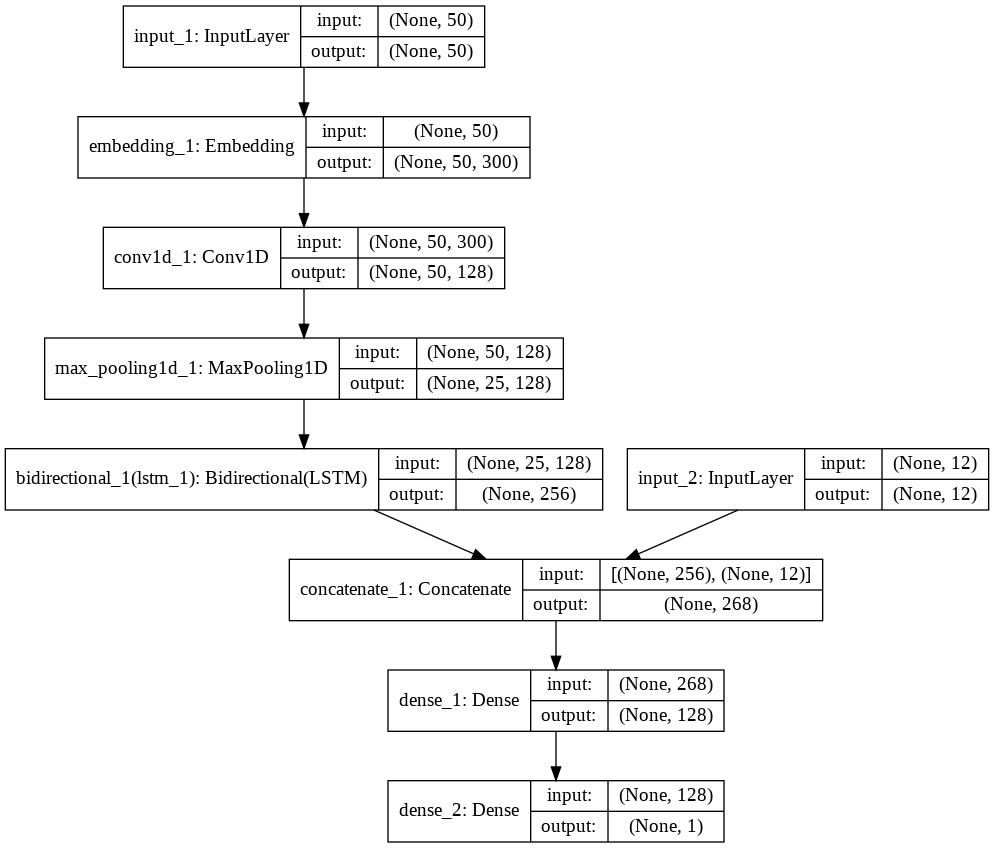

In [ ]:
plot_model(model, show_shapes = True, to_file='model.png')

In [ ]:
predictions = model.predict([valid_seq_x, meta_val_f])

In [ ]:
predictions2 = predictions
predictions2[predictions2 >= 0.5] = 1
predictions2[predictions2 < 0.5] = 0

In [ ]:
predictions[6]

array([0.], dtype=float32)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(predictions2, valid_y[:,1]))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      2831
         1.0       0.63      0.72      0.67       428

    accuracy                           0.91      3259
   macro avg       0.79      0.83      0.81      3259
weighted avg       0.91      0.91      0.91      3259



# Predictions on own data

In [ ]:
emo_tw = pd.read_csv("emotional_tweets.csv")

In [ ]:
emo_tw = emo_tw.sample(10000)

In [ ]:
pred_x = clean_text(emo_tw["text"].tolist())

In [ ]:
pred_x

['jeremycorbyn voted labour m feeling pretty sad today',
 'rt paulmer52 borisjohnson stop campaigning today left wing labour hooligans went berserk market pm campaign',
 'rt miskinblue jeremycorbyn vote labour vote economic catastrophe',
 'fireylivs feel best plan action halt biodiversity loss reduce greenhouse gas emissions net zero climate emergency',
 'rt mikegalsworthy borisjohnson m afraid avaaz better week ago https co 1efctb7zdk',
 'stellacreasy got rolled accept believes bench clowns sorry david milliband decent people needed suggest start tomorrow oh stem antisemitism horror',
 'rt bristolgreen carolinelucas carla_denyer don choose stopping tories amp voting green vote',
 'borisjohnson today vote brexit tories borisbeware',
 'rt mcashmancbe borisjohnson don sneer pile obstacles obsession leave biggest single',
 'bethmiller91 bother reply doesn listen concerns says wrong ll agree disagree right votepursglove notinmyname',
 'croydonlibdems come lib dem voters croydon central nee

In [ ]:
pred_seq_x = tokenizer.texts_to_sequences(pred_x)
pred_seq_x = sequence.pad_sequences(pred_seq_x, padding='post', maxlen=maxlen)

In [ ]:
emo_tw['char_count'] = emo_tw['text'].apply(len)
emo_tw['word_count'] = emo_tw['text'].apply(lambda x: len(x.split()))
emo_tw['word_density'] = emo_tw['char_count'] / (emo_tw['word_count']+1)
emo_tw['punctuation_count'] = emo_tw['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
emo_tw['title_word_count'] = emo_tw['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
emo_tw['upper_case_word_count'] = emo_tw['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [ ]:
emo_tw['noun_count'] = emo_tw['text'].apply(lambda x: check_pos_tag(x, 'noun'))
emo_tw['verb_count'] = emo_tw['text'].apply(lambda x: check_pos_tag(x, 'verb'))
emo_tw['adj_count'] = emo_tw['text'].apply(lambda x: check_pos_tag(x, 'adj'))
emo_tw['adv_count'] = emo_tw['text'].apply(lambda x: check_pos_tag(x, 'adv'))
emo_tw['pron_count'] = emo_tw['text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [ ]:
emo_tw['fear_count'] = emo_tw['text'].apply(lambda x: emotion_count(x, fear_df))
emo_tw['anger_count'] = emo_tw['text'].apply(lambda x: emotion_count(x, anger_df))

In [ ]:
emo_tw

,Unnamed: 0,text,date,addressee,OG_tweet,fear_count,anger_count,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
67406,246682,@jeremycorbyn He had the look of a unemployed ...,2019-12-13,jeremycorbyn,1.177777e+08,1,0,102,19,5.100000,3,2,0,8,2,2,1,2
49290,180402,@BorisJohnson You even pussied out of an inter...,2019-12-11,BorisJohnson,3.131145e+09,1,0,88,13,6.285714,6,2,0,5,1,1,1,2
77170,283275,@BorisJohnson OMG did they teach you mathemati...,2019-11-20,BorisJohnson,3.131145e+09,2,1,290,51,5.576923,9,3,1,13,12,6,5,8
79429,291421,RT @mikegalsworthy: @BorisJohnson I’m afraid @...,2019-12-10,NaN,NaN,1,0,123,17,6.833333,11,1,1,9,2,4,4,1
67149,245727,@jeremycorbyn voted Labour had to be done cant...,2019-12-12,jeremycorbyn,1.177777e+08,0,1,255,49,5.100000,4,1,1,12,13,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36777,134137,@BorisJohnson The best place in the world to l...,2019-12-12,BorisJohnson,3.131145e+09,1,1,127,24,5.080000,2,1,0,8,4,1,1,1
18017,66031,@BorisJohnson Same shit different bus,2019-11-23,BorisJohnson,3.131145e+09,0,1,37,5,6.166667,1,1,0,3,1,2,0,0
16121,59270,RT @petemorristwit: @BorisJohnson @SocialM8589...,2019-12-09,NaN,NaN,1,0,140,22,6.086957,7,2,1,10,4,1,2,2
36151,132065,@JohnnyMercerUK @AyoCaesar @MayaGoodfellow Ill...,2019-12-04,JohnnyMercerUK,9.740258e+07,0,0,218,42,5.069767,6,2,1,14,11,4,1,12


In [ ]:
meta_emo = emo_tw.iloc[:,5:17].to_numpy()
meta_emo.shape

(10000, 12)

In [ ]:
uk_predictions = model.predict([pred_seq_x, meta_emo])

In [ ]:
uk_predictions[uk_predictions >= 0.3] = 1
uk_predictions[uk_predictions < 0.3] = 0

In [ ]:
counter = 0
for cc in uk_predictions:
  if cc == 0:
    counter += 1
counter

9969